<a href="https://colab.research.google.com/github/arshambt/MachineLearning2023/blob/main/Mini_Project2/mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1:

Q1_1:

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1bWhEPCDSnKOW2ReV3R-YQP6OvZV2yaEV

Downloading...
From: https://drive.google.com/uc?id=1bWhEPCDSnKOW2ReV3R-YQP6OvZV2yaEV
To: /content/Perceptron.csv
100% 17.3k/17.3k [00:00<00:00, 30.9MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('/content/Perceptron.csv')
print(df)

x = df.iloc[: , :-1].values
y = df.iloc[:, -1].values

y = np.where(y == -1 , 0 , 1)

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 93)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = Perceptron(random_state = 93, verbose=True)
model.fit(x_train, y_train)

p1 = model.predict(x_test)

s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)

print(f"\nTrain accuracy: {s1}")
print(f"Test accuracy: {s2}")

           x1        x2    y
0    1.028503  0.973218 -1.0
1    0.252505  0.955872 -1.0
2    1.508085  0.672058 -1.0
3    1.940002  1.721370 -1.0
4   -1.048819 -0.844999  1.0
..        ...       ...  ...
395  0.574634  0.782211 -1.0
396 -1.413307 -0.673049  1.0
397 -0.465114 -1.290830  1.0
398  1.522055  0.948007 -1.0
399  0.834118  0.926710 -1.0

[400 rows x 3 columns]
(320, 2) (80, 2) (320,) (80,)
-- Epoch 1
Norm: 2.24, NNZs: 2, Bias: 1.000000, T: 320, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.24, NNZs: 2, Bias: 1.000000, T: 640, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.24, NNZs: 2, Bias: 1.000000, T: 960, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.24, NNZs: 2, Bias: 1.000000, T: 1280, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.24, NNZs: 2, Bias: 1.000000, T: 1600, Avg. loss: 0.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.24, NNZs: 2, Bias: 1.0

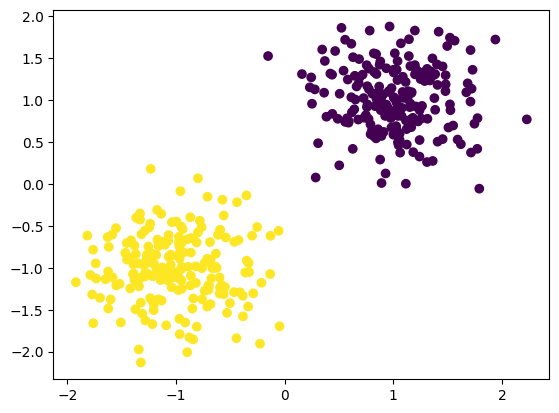

In [ ]:
plt.scatter(x[:,0], x[:,1] , c=y)

<Axes: >

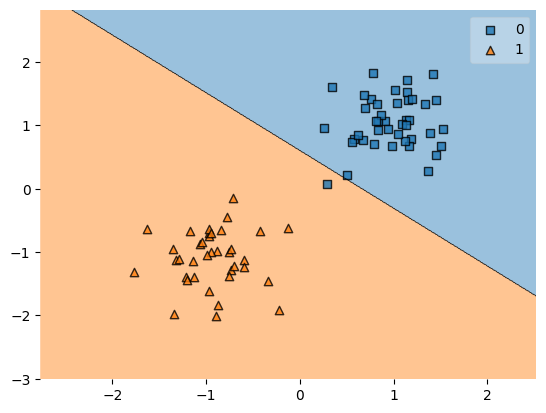

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_test, y_test, clf = model)

# Question 2:

In [ ]:
import numpy as np
import itertools


class McCulloch_Pitts_neuron():

  def __init__(self, weights, threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, x):
    if self.weights @ x.T >= self.threshold:
      return 1
    else:
      return 0


In [ ]:
def BM(input):
  neur1 = McCulloch_Pitts_neuron([0.75, 0.75, 0.75, 0.75], 3)
  neur2 = McCulloch_Pitts_neuron([2, 0, 2, 0], 3)
  neur3 = McCulloch_Pitts_neuron([0, -2, 0, -2], -3)
  neur4 = McCulloch_Pitts_neuron([-2, 0, 0, -2], -3)
  neur5 = McCulloch_Pitts_neuron([0, 2, 2, 0], 3)
  neur6 = McCulloch_Pitts_neuron([0, -2, -2, 0], -3)
  neur7 = McCulloch_Pitts_neuron([2, 0, 0, 2], 3)
  neur8 = McCulloch_Pitts_neuron([0, 2, 0, 2], 3)
  neur9 = McCulloch_Pitts_neuron([2 ,2], 3)
  neur10 = McCulloch_Pitts_neuron([2 ,2], 3)
  neur11 = McCulloch_Pitts_neuron([2 ,2], 3)
  neur12 = McCulloch_Pitts_neuron([6 ,6], 3)


  z1 = neur1.model(np.array([input]))
  z2 = neur2.model(np.array([input]))
  z3 = neur3.model(np.array([input]))
  z4 = neur4.model(np.array([input]))
  z5 = neur5.model(np.array([input]))
  z6 = neur6.model(np.array([input]))
  z7 = neur7.model(np.array([input]))
  z8 = neur8.model(np.array([input]))
  z9 = neur9.model(np.array([z2, z3]))
  z10 = neur10.model(np.array([z4, z5]))
  z11 = neur11.model(np.array([z6, z7]))
  z12 = neur12.model(np.array([z10, z11]))

  return list([z1,z9,z12,z8])

In [ ]:
input_b = [1, 0]
X = list(itertools.product(input_b, input_b, input_b, input_b))
print(X,"\n\n")

for i in X:
  result = BM(i)
  print(f"Input: {i} ", f" Output: {result}")

[(1, 1, 1, 1), (1, 1, 1, 0), (1, 1, 0, 1), (1, 1, 0, 0), (1, 0, 1, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 0, 0), (0, 1, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 0, 0), (0, 0, 1, 1), (0, 0, 1, 0), (0, 0, 0, 1), (0, 0, 0, 0)] 


Input: (1, 1, 1, 1)   Output: [1, 0, 0, 1]
Input: (1, 1, 1, 0)   Output: [0, 1, 1, 0]
Input: (1, 1, 0, 1)   Output: [0, 0, 1, 1]
Input: (1, 1, 0, 0)   Output: [0, 0, 0, 0]
Input: (1, 0, 1, 1)   Output: [0, 1, 1, 0]
Input: (1, 0, 1, 0)   Output: [0, 1, 0, 0]
Input: (1, 0, 0, 1)   Output: [0, 0, 1, 0]
Input: (1, 0, 0, 0)   Output: [0, 0, 0, 0]
Input: (0, 1, 1, 1)   Output: [0, 0, 1, 1]
Input: (0, 1, 1, 0)   Output: [0, 0, 1, 0]
Input: (0, 1, 0, 1)   Output: [0, 0, 0, 1]
Input: (0, 1, 0, 0)   Output: [0, 0, 0, 0]
Input: (0, 0, 1, 1)   Output: [0, 0, 0, 0]
Input: (0, 0, 1, 0)   Output: [0, 0, 0, 0]
Input: (0, 0, 0, 1)   Output: [0, 0, 0, 0]
Input: (0, 0, 0, 0)   Output: [0, 0, 0, 0]


# Question 4:

In [75]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Dfa3-Gen521uSC_Q5a2MZguLeFktXOXL

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1Dfa3-Gen521uSC_Q5a2MZguLeFktXOXL
To: /content/data.csv
100% 527k/527k [00:00<00:00, 85.3MB/s]


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor

df = pd.read_csv('/content/data.csv')

df.info()

print(df.isnull().any())
df.isnull().sum()

print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [77]:
corr_matrix = df.corr()
print(corr_matrix)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

<ipython-input-77-ed094f514566>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


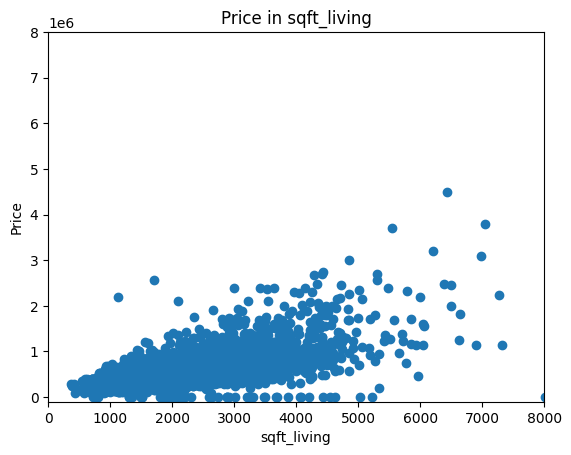

In [78]:
y = np.array(df['price'])
x = df['sqft_living']

#plt.figure(figsize = (5, 5))

plt.xlim(0,8000)
plt.ylim(-100000, 8000000)

plt.ylabel("Price")
plt.xlabel("sqft_living")

plt.title("Price in sqft_living")

plt.scatter(x,y)
plt.show()

In [79]:
d = df["date"].values
year = []
month = []
for i in range(len(d)):
  year.append(d[i][:4])
  month.append(d[i][5:7])
print(month)

df.loc[:, 'Year'] = year
df.loc[:, 'Month'] = month
df.pop("date")
df

['05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05', '05

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Year,Month
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,05
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,05
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,05
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,05
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,07
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,07
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,07
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,2014,07


In [80]:
df1 = df.copy()

dummy = ['street', 'city', 'statezip', 'country', 'Year', 'Month']
df1 = pd.get_dummies(df1, columns=dummy, drop_first=True)
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,Month_06,Month_07
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,1
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,1
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,1
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,1,0,0,0,0,0,0,1


In [81]:
x = df1.iloc[: , 1:]
y = df1.iloc[: , 0]
print(x.shape, y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , shuffle = True, random_state = 93)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

x_train = scaler1.fit_transform(x_train)
x_test = scaler1.transform(x_test)
y_train = scaler2.fit_transform(y_train[:, None])
y_test = scaler2.transform(y_test[:, None])

print(x_train)
print("\n\n",y_train)


(4600, 4657) (4600,)
(3680, 4657) (920, 4657) (3680,) (920,)
[[0.44444444 0.375      0.13601824 ... 0.         0.         0.        ]
 [0.22222222 0.21875    0.06382979 ... 0.         1.         0.        ]
 [0.55555556 0.34375    0.20364742 ... 0.         0.         0.        ]
 ...
 [0.33333333 0.125      0.05547112 ... 0.         0.         0.        ]
 [0.33333333 0.375      0.25683891 ... 0.         1.         0.        ]
 [0.44444444 0.3125     0.13981763 ... 0.         1.         0.        ]]


 [[0.02228281]
 [0.00810455]
 [0.02068071]
 ...
 [0.00936442]
 [0.04701015]
 [0.01391501]]


<ipython-input-81-331db4d04924>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_train = scaler2.fit_transform(y_train[:, None])
<ipython-input-81-331db4d04924>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test = scaler2.transform(y_test[:, None])


In [87]:
model = MLPRegressor((100, 50), solver='adam', validation_fraction=0.1, random_state=93, verbose=True)

model.fit(x_train, y_train.ravel())

y_pred = model.predict(x_test)

s1 = model.score(x_train, y_train)
s2 = model.score(x_test, y_test)

print(model.validation_scores_)

print(f"Train accuracy: {s1}")
print(f"Test accuracy: {s2}")

Iteration 1, loss = 0.00385363
Iteration 2, loss = 0.00062642
Iteration 3, loss = 0.00034170
Iteration 4, loss = 0.00025609
Iteration 5, loss = 0.00021216
Iteration 6, loss = 0.00018805
Iteration 7, loss = 0.00017178
Iteration 8, loss = 0.00016335
Iteration 9, loss = 0.00015376
Iteration 10, loss = 0.00014755
Iteration 11, loss = 0.00014028
Iteration 12, loss = 0.00013553
Iteration 13, loss = 0.00012519
Iteration 14, loss = 0.00011754
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
None
Train accuracy: 0.6757593022435961
Test accuracy: 0.026288597800712243


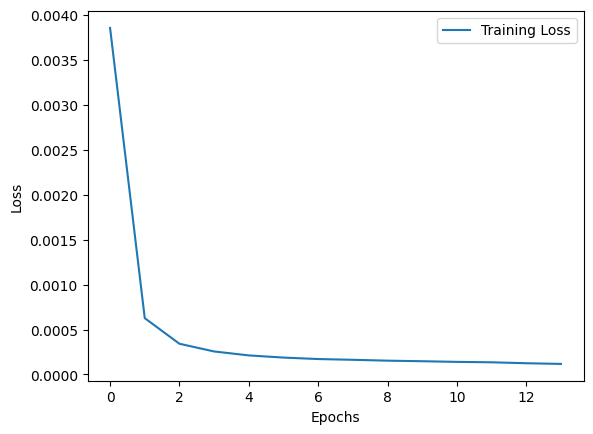

In [88]:
# Plot the training and validation loss
loss_hist=[]

for loss in model.loss_curve_:
 loss_hist.append(loss)

plt.plot(np.arange(len(loss_hist)), loss_hist)

plt.legend(['Training Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Question 5:

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns

x,y = load_iris(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=93)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(120, 4) (30, 4) (120,) (30,)


Logistic Regression
Train accuracy: 0.9833333333333333
Test accuracy: 1.0


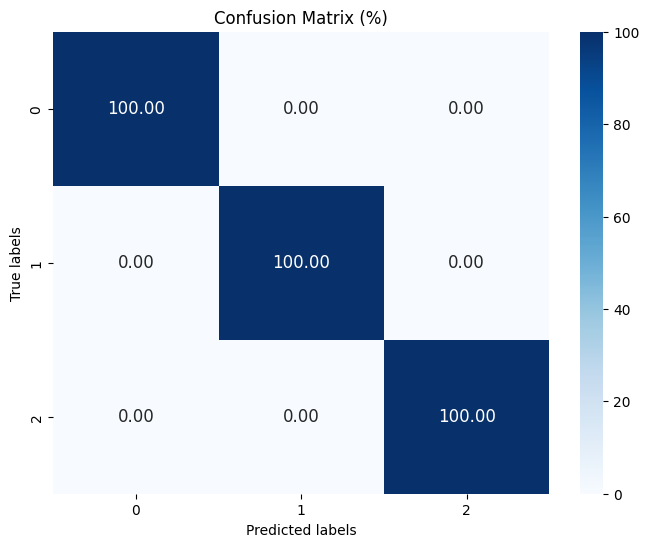

In [65]:
model1 = LogisticRegression()

model1.fit(x_train, y_train.ravel().astype('int'))

p1 = model1.predict(x_test)

s1 = model1.score(x_train, y_train.ravel().astype('int'))
s2 = model1.score(x_test, y_test.ravel().astype('int'))


cf = confusion_matrix(y_test, p1)
cf_percent = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


print("Logistic Regression")
print(f"Train accuracy: {s1}")
print(f"Test accuracy: {s2}")

In [68]:
w = model1.coef_
f = model1.n_features_in_
b = model1.intercept_
c = model1.classes_
print(f"weights: {w}\n")
print(f"features: {f}\n")
print(f"bias: {b}\n")
print(f"classes: {c}")

weights: [[-0.43973035  0.8564828  -2.35966552 -0.96185127]
 [ 0.62951189 -0.37670794 -0.1816401  -0.89119988]
 [-0.18978153 -0.47977485  2.54130562  1.85305115]]

features: 4

bias: [  9.54549029   1.4908781  -11.0363684 ]

classes: [0 1 2]


MLP Classifier
Train accuracy: 0.9833333333333333
Test accuracy: 1.0


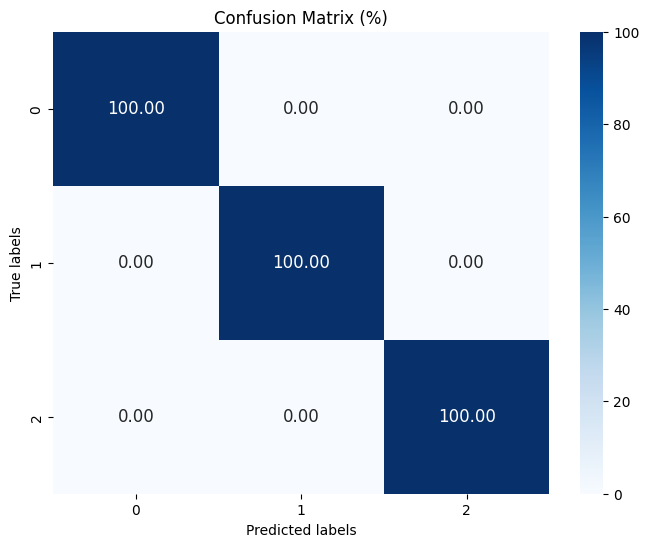

In [69]:
model2 = MLPClassifier(hidden_layer_sizes=(30),max_iter = 1000, solver='adam', random_state=93)

model2.fit(x_train, y_train.ravel().astype('int'))

p2 = model2.predict(x_test)

s1 = model2.score(x_train, y_train.ravel().astype('int'))
s2 = model2.score(x_test, y_test.ravel().astype('int'))


cf = confusion_matrix(y_test, p2)
cf_percent = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

print("MLP Classifier")
print(f"Train accuracy: {s1}")
print(f"Test accuracy: {s2}")

In [71]:
w = model2.coefs_
b = model2.intercepts_
o = model2.n_outputs_
l = model2.n_layers_
c = model2.classes_
print(f"weights: {w}\n")
print(f"bias: {b}\n")
print(f"outputs: {o}\n")
print(f"layers: {l}")
print(f"classes: {c}")

weights: [array([[ 1.44362598e-01,  2.43597952e-01, -6.60644991e-06,
         3.46879591e-01,  4.61362484e-18,  2.11944504e-01,
         6.71636227e-01,  3.13575673e-01,  2.28533341e-01,
         1.24308739e-01,  1.32783525e-01,  2.24390277e-02,
         2.25161792e-01, -1.32471503e-01,  4.95557839e-19,
         6.79689907e-06,  1.40258176e-01, -9.22235165e-03,
         8.89614992e-02,  1.91425488e-11,  3.47027817e-03,
        -5.57472591e-01,  1.95614648e-01,  1.24348105e-01,
         1.75959029e-01,  2.59359749e-01,  3.50699562e-01,
         5.20486968e-01,  5.52355447e-01,  2.22265710e-01],
       [ 3.43703476e-01,  2.78512961e-01, -2.69921918e-19,
         3.17186465e-02, -6.94354959e-04,  3.23447196e-02,
         3.82736482e-02, -1.00129422e-01,  2.47013892e-01,
         3.70710195e-01,  6.52366381e-01, -2.45310514e-02,
         1.51901741e-01,  3.04500943e-01, -3.66575497e-03,
        -1.31944081e-03,  5.90912281e-01,  1.11744448e-02,
         5.27766840e-02, -1.99419421e-02, -1.

RBF
Train accuracy: 0.9666666666666667
Test accuracy: 1.0


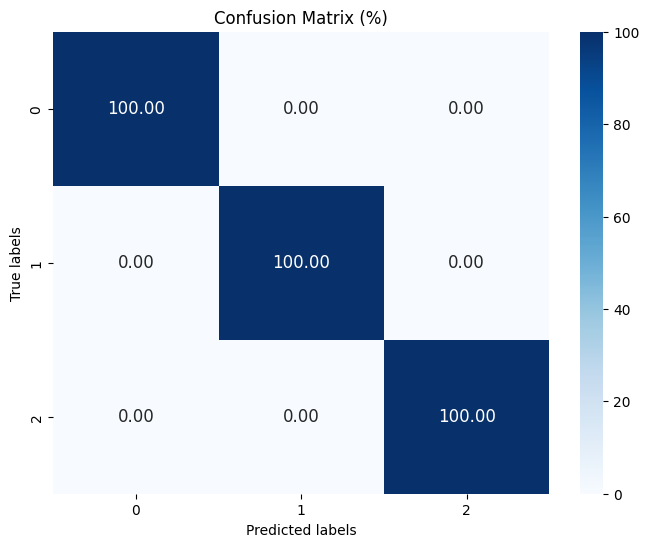

In [72]:
model3 = SVC(kernel='rbf', random_state=93)

model3.fit(x_train, y_train.ravel().astype('int'))

p3 = model3.predict(x_test)

s1 = model3.score(x_train, y_train.ravel().astype('int'))
s2 = model3.score(x_test, y_test.ravel().astype('int'))


cf = confusion_matrix(y_test, p3)
cf_percent = cf.astype('float') / cf.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cf_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


print("RBF")
print(f"Train accuracy: {s1}")
print(f"Test accuracy: {s2}")

In [73]:
w = model3.class_weight_
b = model3.intercept_
i = model3.n_iter_
f = model3.n_features_in_
print(f"weights: {w}\n")
print(f"bias: {b}\n")
print(f"iterations: {i}\n")
print(f"features: {f}")

weights: [1. 1. 1.]

bias: [ 0.09790569 -0.05084778 -0.18247222]

iterations: [10 28 36]

features: 4
